## Arboles de Decisión
Este modelo descompone nuestros datos al tomar decisiones basadas en una serie de preguntas. Son modelos atractivos si nos importa la interpretabilidad.
Consideremos el siguiente ejemplo en el que usamos un árbol de decisiones para decidir una actividad en un día en particular:

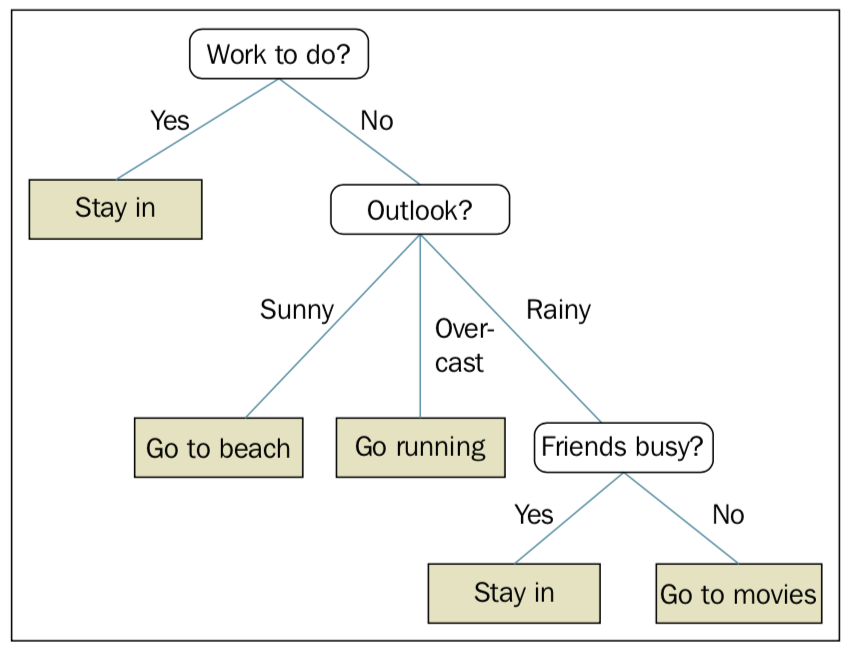

Los árboles de decisión sufren de alta variación. Esto significa que si dividimos los datos de entrenamiento en dos partes al azar y ajustamos un árbol de decisión a ambas mitades, los resultados que obtengamos podrían ser bastante diferentes.


### ¿Cómo Funcionan?
* Basado en las características de nuestro conjunto de entrenamiento, el modelo aprende una serie de preguntas para inferir las etiquetas de clase de las muestras.

* Comenzamos en la raíz del árbol y dividimos los datos sobre la característica que resulta en la mayor **Ganancia de Información (IG)**

*  Se repite el proceso en cada nodo secundario hasta que las hojas estén puras (que las muestras en cada nodo pertenecen a la misma clase).

* Si se produce **sobreajuste** (árboles muy profundos) se debe podar el árbol estableciendo un límite para la profundidad máxima del árbol.

### Ganancia de Información (IG):

Para dividir los nodos en las características más informativas, necesitamos definir una función objetivo que queremos optimizar a través del algoritmo de aprendizaje de árbol. Aquí, nuestra función objetivo es maximizar la ganancia de información en cada división, que definimos de la siguiente manera:

\begin{align}
IG(D_p,f) = I(D_p) - \sum_{j=1}^{m}{\frac{N_j}{N_p}I(D_j)}
\end{align}

$f$  :  Característica (feature to perform)  
$D_p, D_j$  :  Son el conjunto de datos del nodo primario y el $j^{th}$ secundario  
$I$  :  Es nuestra medida de **Impureza**  
$N_p$  :  Es el número total de muestras en el nodo principal  
$N_j$  :  es el número de muestras en el $j^{th}$ nodo hijo  

La ganancia de información es simplemente la diferencia entre la impureza del nodo principal y la suma de las impurezas del nodo secundario: **cuanto menor es la impureza de los nodos secundarios, mayor es la ganancia de información**.

La mayoría de las bibliotecas (incluyendo sklearn) implementan **árboles de decisión binarios**. Esto significa que cada nodo padre se divide en dos nodos hijos, $D_{left}$ y $D_{right}$  
  

\begin{align}
IG(D_p,a) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})
\end{align}

### Medidas de impureza

Las tres medidas de impureza o criterios de división son:
* **Índice de Gini** ($I_G$)
* **Entropía** ($I_H$)
* **Error de clasificación** ($I_E$)

### Entropía

La entropía se refiere a una **medida de incertidumbre o desorden**, ayuda a elegir cuál atributo deber ser el siguiente en seleccionarse.  
Comencemos con la definición de entropía para todas las clases no vacías ($p (i | t) ≠ 0$):

\begin{align}
I_H(t) = -\sum_{i=1}^{c}{p(i|t)\log_2 p(i|t)}
\end{align}

$p(i|t)$: Proporción de las muestras que pertenecen a c en un nodo t  
$c$ : Clase  
$t$ : Nodo particular  
  
La **entropía** es 0 si todas las muestras en un nodo pertenecen a la misma clase.  
La **entropía** es máxima si tenemos una distribución de la clase uniforme. Se dice que es la máxima incertidumbre

En de finitiva el criterio de entropía intenta maximizar la información mutua en el árbol.


### Índice Gini

Puede entenderse como un criterio para minimizar la probabilidad de error de clasificación:

\begin{align}
I_G(t) = \sum_{i=1}^{c}{p(i|t)·(-p(i|t))} = 1 - \sum_{i=1}^{c}{p(i|t)^2}
\end{align}

El **Índice Gini** es máximo si las clases están perfectamente mezcladas  
Por ejemplo en una configuración de clase binaria:

\begin{align}
1 - \sum_{i=1}^{c}{0.5^2} = 0.5
\end{align}

Sin embargo, en la práctica, tanto el índice de Gini como la entropía generalmente producen resultados muy similares y, a menudo, no vale la pena dedicar mucho tiempo a evaluar árboles utilizando diferentes criterios de impureza en lugar de experimentar con diferentes cortes de poda.

 ### Error de clasificación
 
\begin{align}
I_E = 1 - max[p(i|t) ]
\end{align}
 
Es un criterio útil para la poda, mas no para hacer crecer un árbol de decisión

### Ejemplo

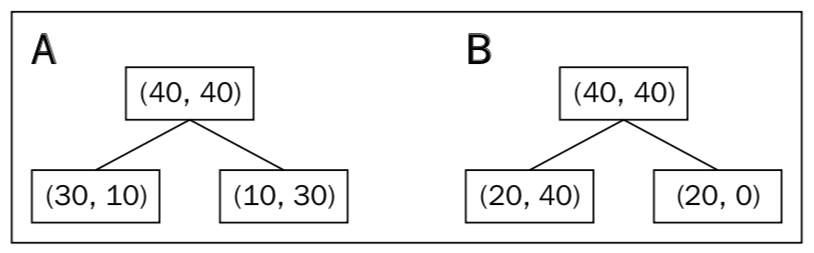

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

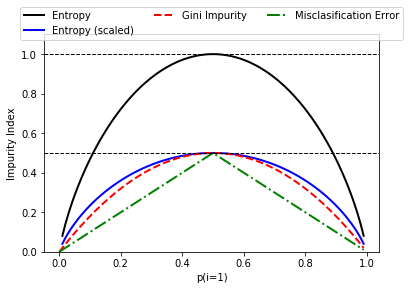

In [13]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy',
                           'Entropy (scaled)',
                           'Gini Impurity',
                           'Misclasification Error'
                          ],
                          ['-','-','--','-.'],
                          ['black','blue','red','green','cyan']
                         ):
    line = ax.plot(x,i, label = lab,linestyle = ls,lw = 2, color = c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()